# 투빅스 17기 정규세션 Clustering 실습 자료 2

**투빅스 16기 박한나**

### Reference
[고려대학교 김성범 교수님: 군집분석 파이썬 실습](https://www.youtube.com/watch?v=_U7AUJqzlJs)

위 강의의 코드를 정리한 자료입니다. 파이썬 및 모델 구현에 능숙하신 분들은 해당 파일을 쭉 따라서 실습을 진행해주시고, 구현이 어려우신 분들은 위 링크의 강의를 참고해주세요.

> **목표:** 계층적 군집화와 K-평균 군집화를 구현하고 학습 상태를 관찰

### 목차
1. 모듈 및 데이터 불러오기
2. 생성된 데이터셋에 군집화 알고리즘 적용하기
    + 계층적 군집화 예제 1 (Blobs)
    + 계층적 군집화 예제 2 (Two Moons)
    + K-평균 군집화 예제 1 (Blobs)
    + K-평균 군집화 예제 2 (Two Moons)
    + DBSCAN 예제 1 (Blobs)
    + DBSCAN 예제 2 (Two Moons)

## 1. 모듈 및 데이터 불러오기

### 1.1 모듈 불러오기

In [ ]:
# 데이터 전처리
import numpy as np
import pandas as pd

# 기계학습 모델(군집화) 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# 시각화 & 편의용
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

### 1.2 데이터 셋 생성하기 및 살펴보기

### 1.2.1 Blobs

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
blobs_x, blobs_y = make_blobs(n_samples=500, centers=5, shuffle=True, random_state=10)

In [ ]:
print('blobs_x data shape :', blobs_x.shape)
print('blobs_y data shape :', blobs_y.shape)

blobs_x data shape : (500, 2)
blobs_y data shape : (500,)


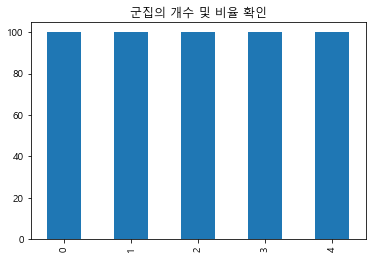

In [ ]:
pd.value_counts(blobs_y).plot(kind='bar', title='군집의 개수 및 비율 확인')
plt.show()

In [ ]:
np.unique(blobs_y)

array([0, 1, 2, 3, 4])

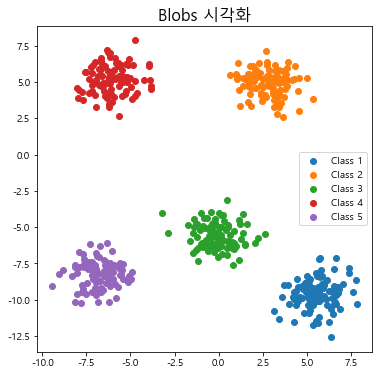

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Blobs 시각화', fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c, 0], blobs_x[blobs_y == c, 1], label='Class {}'.format(c+1))
plt.legend()
plt.show()

### 1.2.2  Two Moons

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
moons_x, moons_y = make_moons(n_samples=500, shuffle=True, noise=0.05, random_state=0)

print('moons_x data shape :', moons_x.shape)
print('moons_y data shape :', moons_y.shape)

moons_x data shape : (500, 2)
moons_y data shape : (500,)


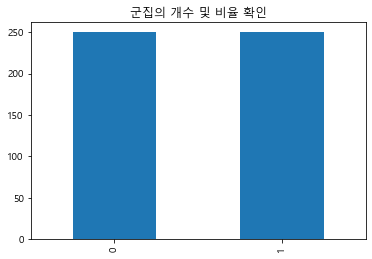

In [ ]:
pd.value_counts(moons_y).plot(kind='bar', title='군집의 개수 및 비율 확인')
plt.show()

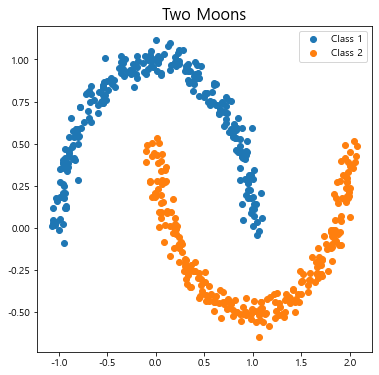

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Two Moons', fontsize=16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c, 0], moons_x[moons_y == c, 1], label='Class {}'.format(c+1))
plt.legend()
plt.show()

## 2. 생성된 데이터셋에 군집화 알고리즘 적용

### 2.1 계층적 군집화 예제 1 (Blobs)

### 2.1.1 Hierarchical Clustering Option

**parameter**

affinity: 유사도 측정에 사용할 거리 척도 
+ euclidean
+ manhattan
+ cosine
+ precomputed (others)

linkage: 군집 간 거리 계산 척도
+ single (min)
+ complete (max)
+ average
+ ward

### 2.1.2 Hierarchical Clustering 모델 정의

+ Linkage: complete(max)
+ Distance: euclidean
+ Threshold: 5

Threshold: 덴드로그램의 y축에서 군집을 나누는 기준이 된다.밑에 덴드로그램 그려보기에서 threshold 값을 바꿔가며 비교해보자.

In [ ]:
# 모델 정의
model = AgglomerativeClustering(
    linkage='complete',
    affinity='euclidean',
    distance_threshold=5,
    n_clusters=None)

# 학습
blobs_clusters = model.fit_predict(blobs_x)

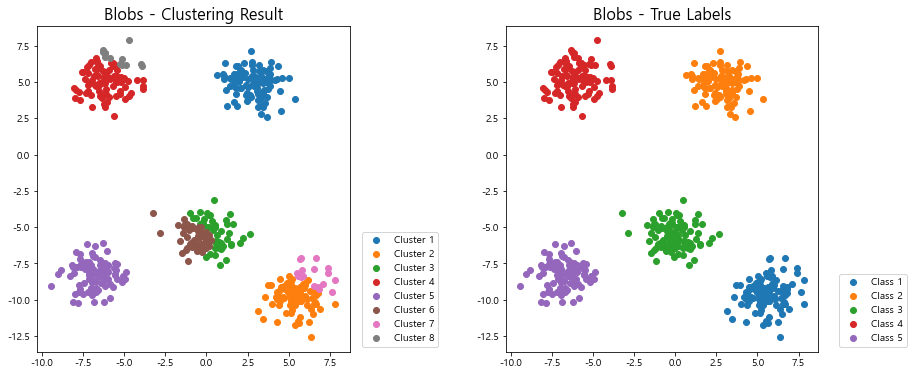

In [ ]:
# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Blobs - Clustering Result', fontsize=16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c, 0], blobs_x[blobs_clusters == c, 1], label = 'Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Blobs - True Labels', fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0], blobs_x[blobs_y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

### 2.1.3 Dendrogram 그려보기

In [ ]:
linkage_matrix = linkage(blobs_x, method='complete', metric='euclidean')

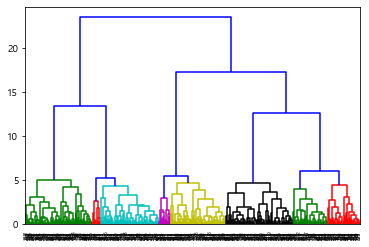

In [ ]:
_ = dendrogram(linkage_matrix, color_threshold = 5)

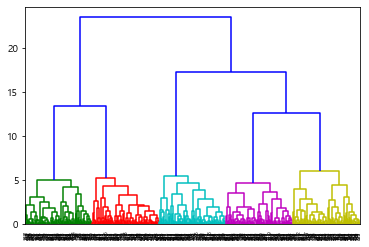

In [ ]:
_ = dendrogram(linkage_matrix, color_threshold=10)

### 2.1.4 새로운 threshold로 재학습 하기

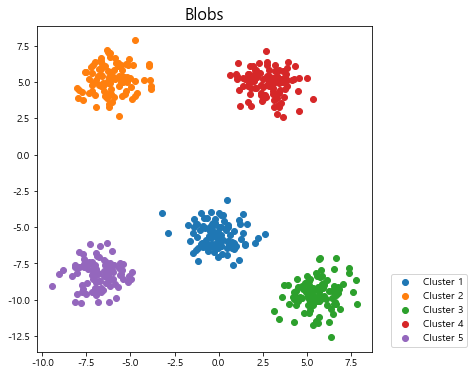

In [ ]:
model = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold = 10,
    n_clusters= None)
blobs_clusters = model.fit_predict(blobs_x)

plt.figure(figsize=(6, 6))

plt.title('Blobs', fontsize=16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c,0], blobs_x[blobs_clusters == c, 1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

### 2.2 계층적 군집화 예제 2 (Two Moons)

### 2.2.1 Two Moons 데이터에 적용

In [ ]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold = 2,
    n_clusters = None)

# 학습
moons_clusters = model.fit_predict(moons_x)

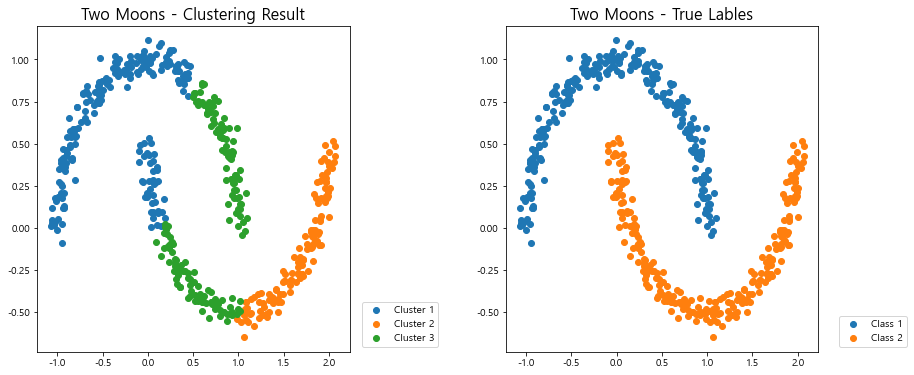

In [ ]:
# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Two Moons - Clustering Result', fontsize=16)
for c in np.unique(moons_clusters):
    plt.scatter(moons_x[moons_clusters == c,0], moons_x[moons_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Two Moons - True Lables', fontsize=16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0], moons_x[moons_y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

### 2.2.2 Linkage 변경하기

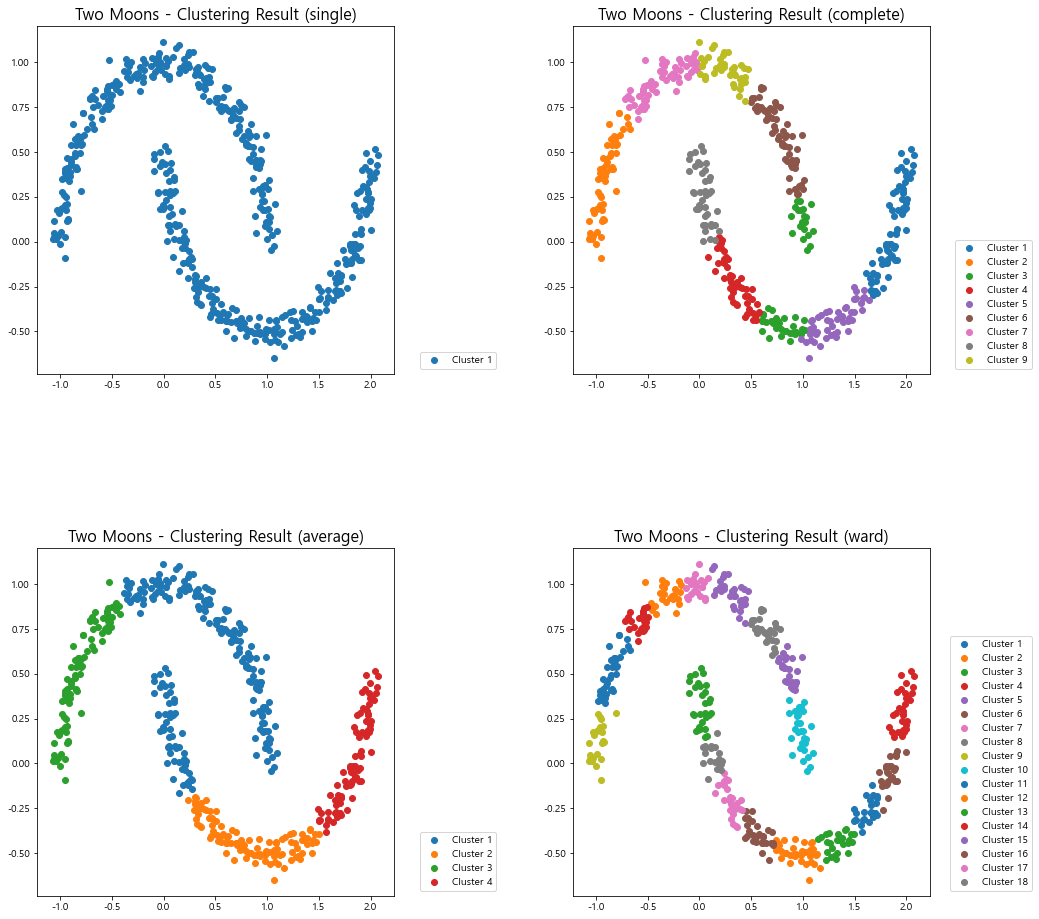

In [ ]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold = 1,
    n_clusters = None)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x)
    cluster_results[_linkage] = _results
    
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_linkage), fontsize=16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

### 2.2.3 2개의 군집으로 고정 후 linkage 변경

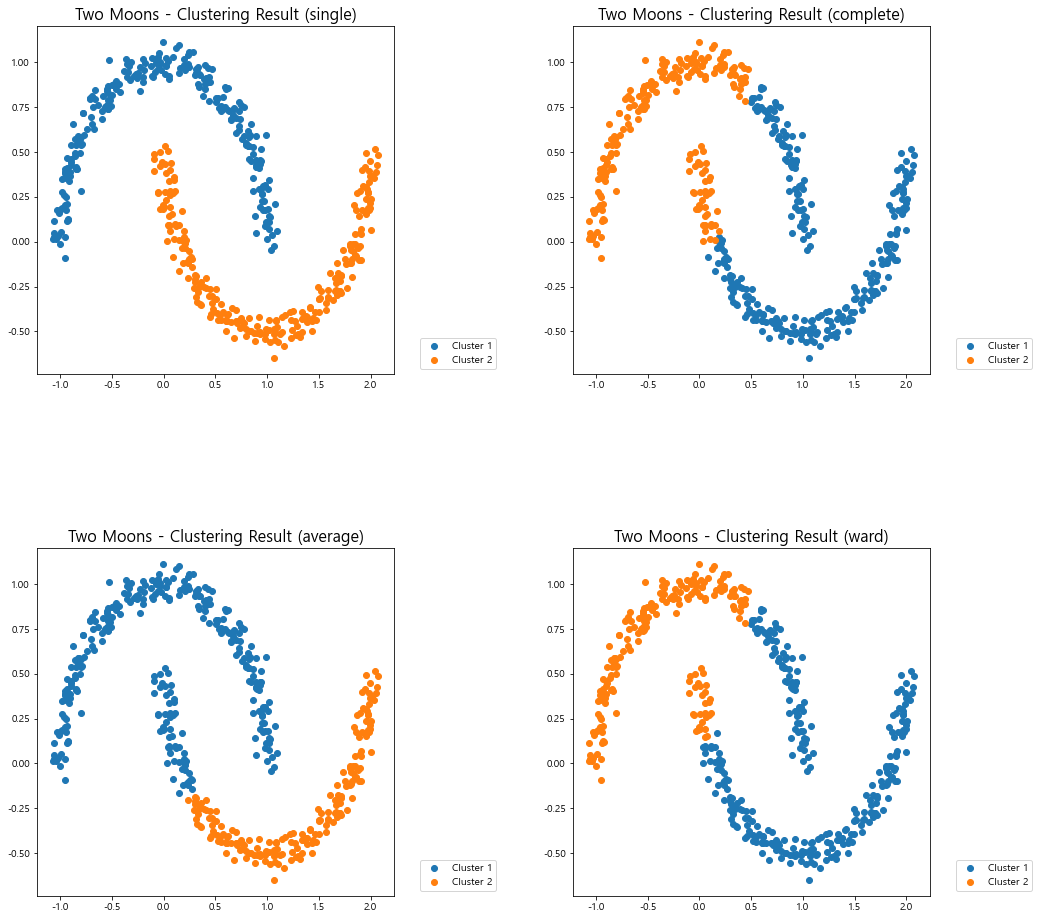

In [ ]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold = None,
    n_clusters = 2)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(moons_x)
    cluster_results[_linkage] = _results
    
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_linkage), fontsize=16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

### 2.2.4 거리 종류 변경하기

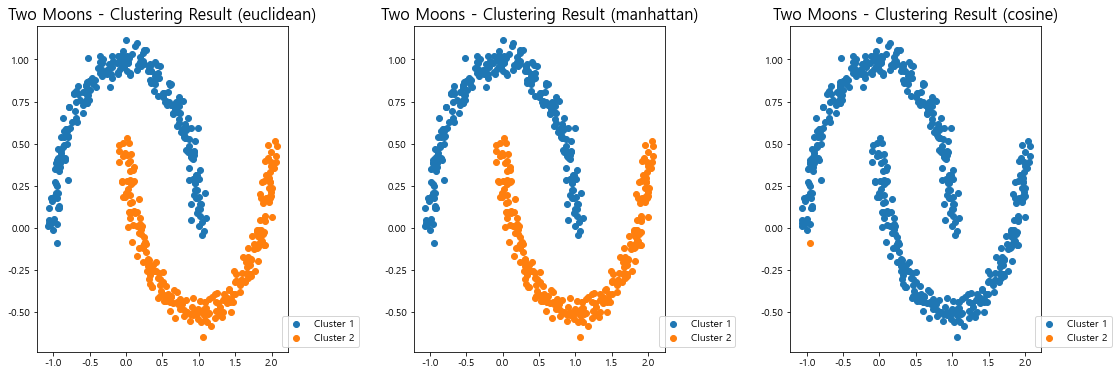

In [ ]:
# 모델 정의
model = AgglomerativeClustering(
    linkage = 'single',
    affinity = 'euclidean',
    distance_threshold = None,
    n_clusters = 2)

distance_list = ['euclidean', 'manhattan', 'cosine']
cluster_results = {}
for _distance in distance_list:
    model.affinity = _distance
    _results = model.fit_predict(moons_x)
    cluster_results[_distance] = _results
    
plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _distance in enumerate(distance_list):
    plt.subplot(1, 3, i+1)
    plt.title('Two Moons - Clustering Result ({})'.format(_distance), fontsize=16)
    _results = cluster_results[_distance]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

### 2.3 K-평균 군집화 예제 1 (Blobs)

### 2.3.1 K-Means Clustering Options

**parameter**

n_cluster: 군집 개수
+ K-means 군집화는 군집 개수를 사전에 설정해야 함

init: K-means 군집화의 초기 군집 중심을 설정하는 방법
+ random (완전히 random 하게 설정)
+ k-means++ (초기 군집 중심을 설정하는 알고리즘)

n_init: 서로 다른 초기 군집 중심을 사용하여 K-means 알고리즘을 반복할 횟수
+ n_init 횟수만큼 K-means를 수행한 뒤 가장 좋은 결과를 출력
+ 클러스터 내 군집 중심까지의 Sum of Squared Distance의 값이 가장 작은 결과

max_iter: K-means 알고리즘에서 업데이트 할 횟수

### 2.3.2 K-Means Clustering 모델 정의
+ n_cluters: 5
+ init_method: 'random'
+ n_init: 1

In [ ]:
# 모델 정의
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 1,
    random_state = 0)

# 학습
blobs_clusters = model.fit_predict(blobs_x)

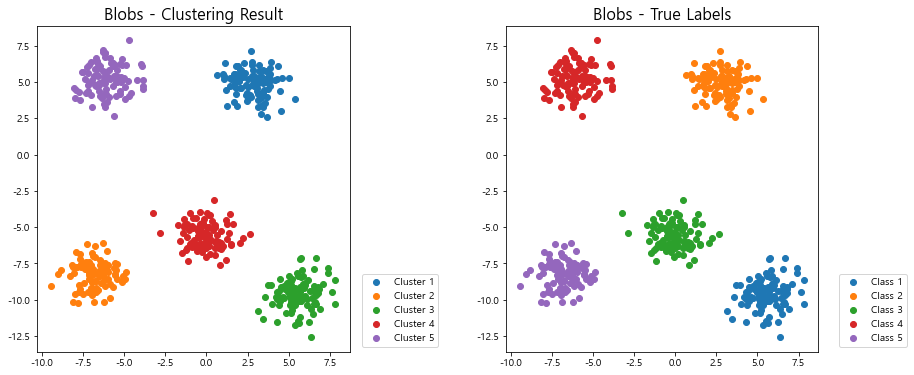

In [ ]:
# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Blobs - Clustering Result', fontsize=16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c, 0], blobs_x[blobs_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Blobs - True Labels', fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0], blobs_x[blobs_y == c, 1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

### 2.3.3 Random state 변경하여 학습 확인

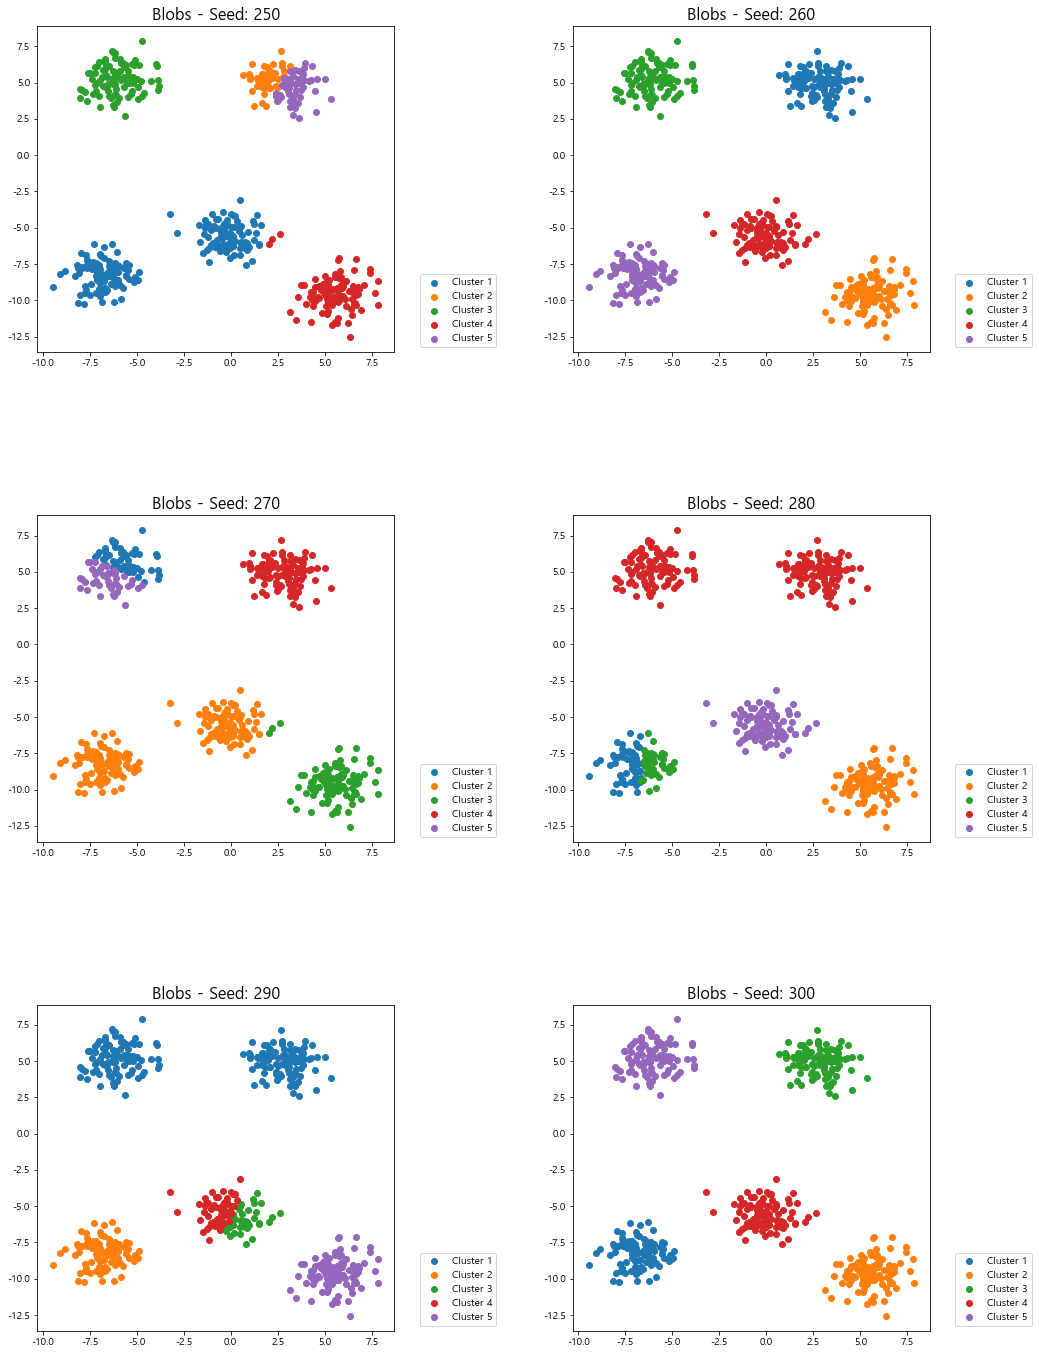

In [ ]:
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results
    
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

### 2.3.4 n_init 증가하면서 학습 확인

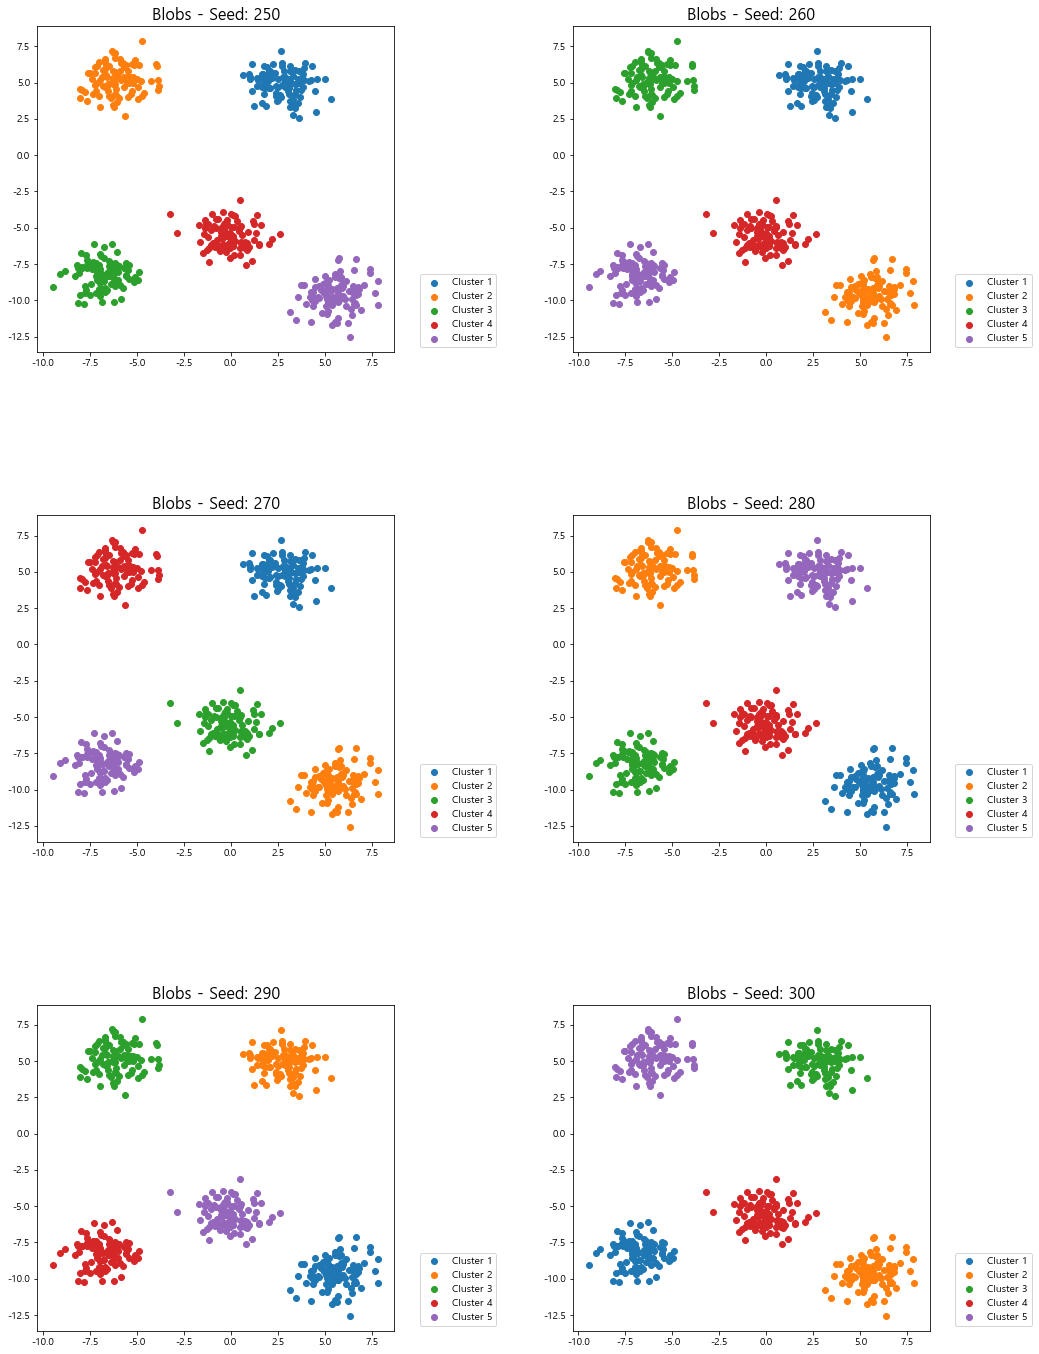

In [ ]:
model = KMeans(
    n_clusters = 5,
    init = 'random',
    n_init = 15)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results
    
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

### 2.3.5 k-means++ 적용하고 결과 확인

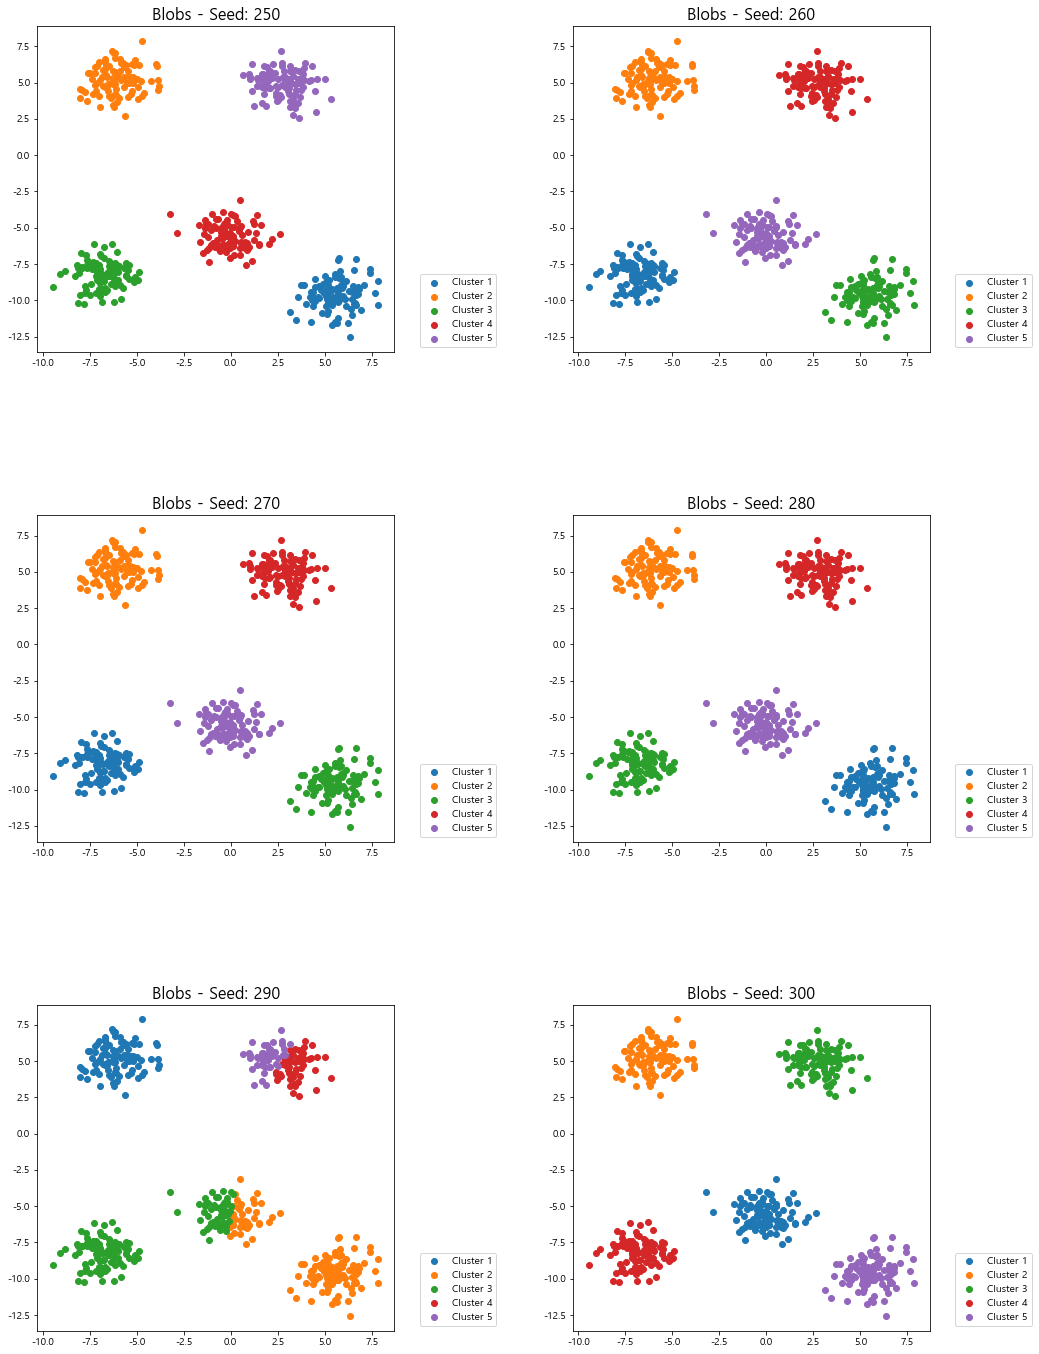

In [ ]:
model = KMeans(
    n_clusters = 5,
    init = 'k-means++',
    n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(blobs_x)
    cluster_results[_seed] = _results
    
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Blobs - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

### 2.3.6 Cluster 개수 정해주기(Silhoullete Score)

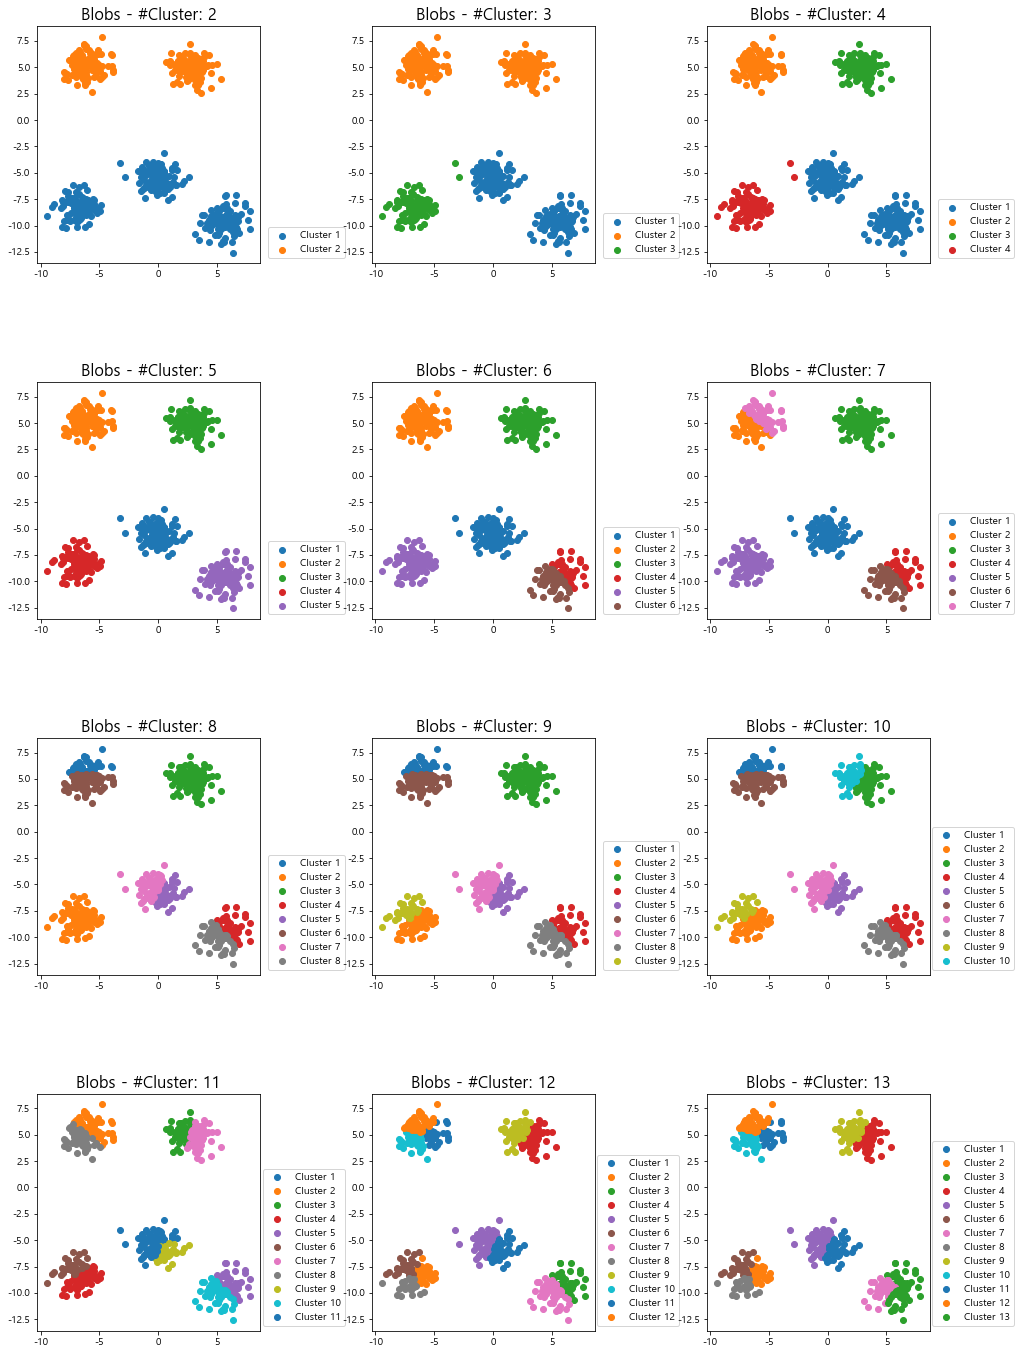

In [ ]:
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 10,
    random_state = 0)

cluster_results = {}
for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(blobs_x)
    
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _n_clusters in enumerate(np.arange(2, 14)):
    plt.subplot(4, 3, i+1)
    plt.title('Blobs - #Cluster: {}'.format(_n_clusters), fontsize=16)
    _results = cluster_results[_n_clusters]
    for c in np.unique(_results):
        plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))

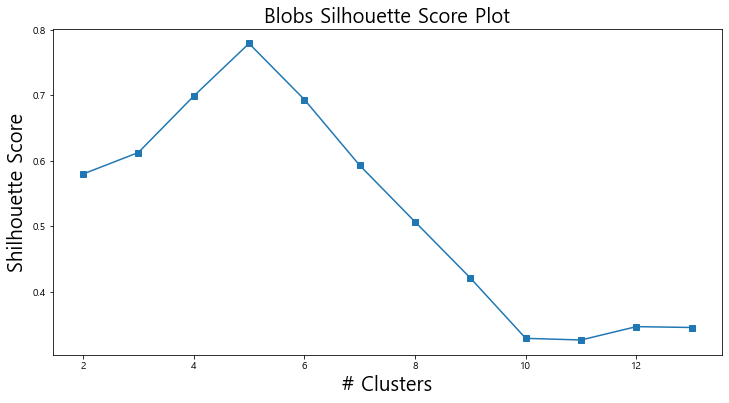

In [ ]:
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 10,
    random_state = 0)

scores = []
cluster_results = {}
for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(blobs_x)
    scores.append(silhouette_score(blobs_x, model.labels_))
    
plt.figure(figsize=(12, 6))
plt.title('Blobs Silhouette Score Plot', fontsize=20)
plt.xlabel('# Clusters', fontsize=20)
plt.ylabel('Shilhouette Score', fontsize=20)
plt.plot(np.arange(2, 14), scores, marker='s')
plt.show()

In [ ]:
cluster_results.keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

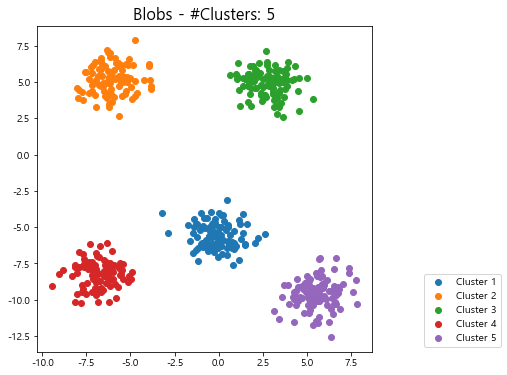

In [ ]:
plt.figure(figsize=(6,6))
plt.title('Blobs - #Clusters: {}'.format(5), fontsize=16)
_results = cluster_results[5]
for c in np.unique(_results):
    plt.scatter(blobs_x[_results == c,0], blobs_x[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()

### 2.4 K-평균 군집화 예제 2 (Two Moons)

### 2.4.1 군집 갯수에 따른 실루엣 스코어 확인

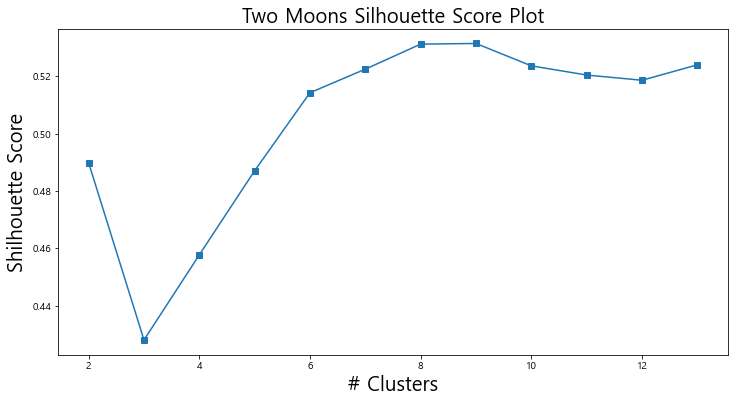

In [ ]:
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 10,
    random_state = 0)

scores = []
cluster_results = {}
for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(moons_x)
    scores.append(silhouette_score(moons_x, model.labels_))
    
plt.figure(figsize=(12, 6))
plt.title('Two Moons Silhouette Score Plot', fontsize=20)
plt.xlabel('# Clusters', fontsize=20)
plt.ylabel('Shilhouette Score', fontsize=20)
plt.plot(np.arange(2, 14), scores, marker='s')
plt.show()

### 2.4.2 실루엣 스코어가 가장 높았던 경우를 시각화

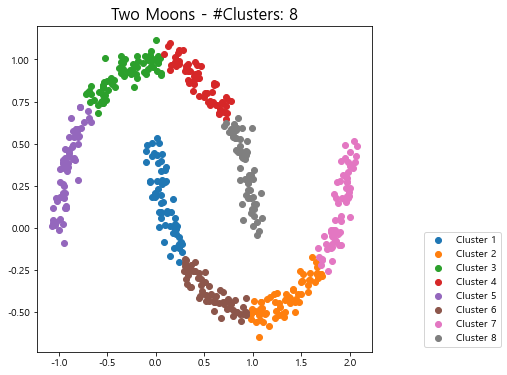

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Two Moons - #Clusters: {}'.format(8), fontsize=16)
_results = cluster_results[8]
for c in np.unique(_results):
    plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()

### 2.4.3 전체 결과 확인하기

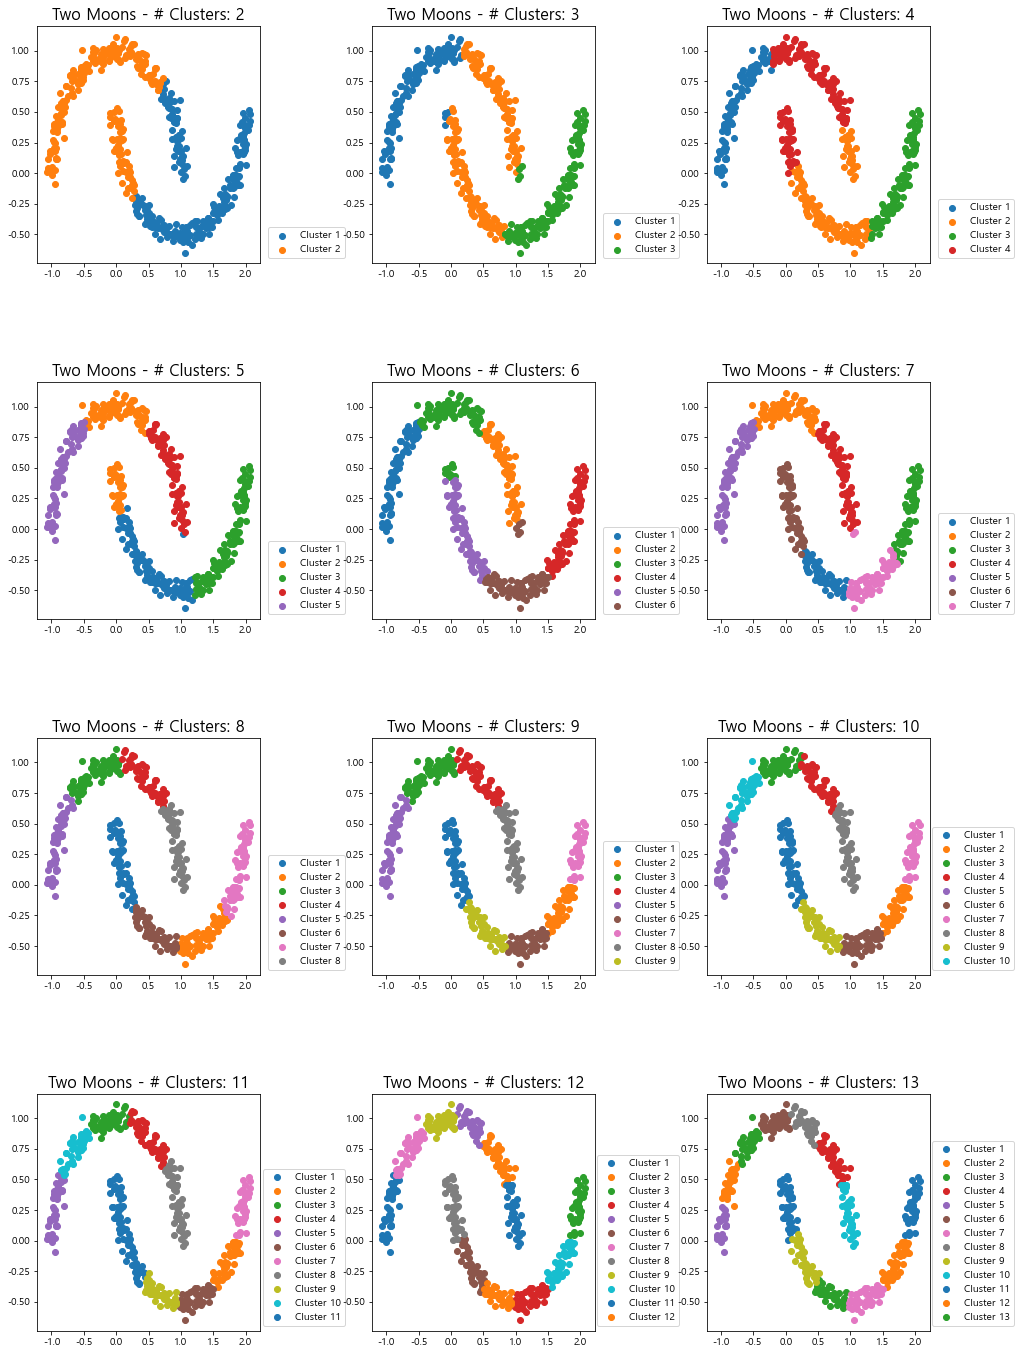

In [ ]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _n_clusters in enumerate(np.arange(2, 14)):
    plt.subplot(4, 3, i+1)
    plt.title('Two Moons - # Clusters: {}'.format(_n_clusters), fontsize=16)
    _results = cluster_results[_n_clusters]
    for c in np.unique(_results):
        plt.scatter(moons_x[_results == c,0], moons_x[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))

### 2.5 DBSCAN 예제 1 (Blobs)

### 2.5.1 DBSCAN Clustering Option

**parameter**

eps: 핵심 포인트를 중심으로 측정되는 유클리디언 거리값  
min_samples: 핵심 포인트를 중심으로 간주하는 주변 지역의 표본 수

### 2.5.2 DBSCAN 모델정의

+ eps = 0.2
+ min_samples = 5
+ metric='euclidean'

In [ ]:
# 모델 정의
model = DBSCAN(
    eps = 1,
    min_samples = 5,
    metric='euclidean')

# 학습
blobs_clusters = model.fit_predict(blobs_x)

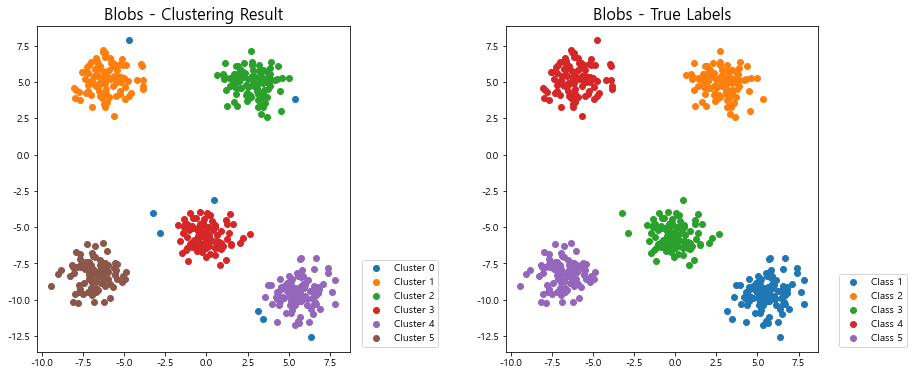

In [ ]:
# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Blobs - Clustering Result', fontsize=16)
for c in np.unique(blobs_clusters):
    plt.scatter(blobs_x[blobs_clusters == c, 0], blobs_x[blobs_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Blobs - True Labels', fontsize=16)
for c in np.unique(blobs_y):
    plt.scatter(blobs_x[blobs_y == c,0], blobs_x[blobs_y == c, 1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

### 2.6 DBSCAN 예제 2 (Two Moons)

### 2.6.1 DBSCAN 모델정의

+ eps = 0.2
+ min_samples = 5
+ metric='euclidean'

In [ ]:
# 모델 정의
model = DBSCAN(
    eps = 0.2,
    min_samples = 5,
    metric='euclidean')

# 학습
moons_clusters = model.fit_predict(moons_x)

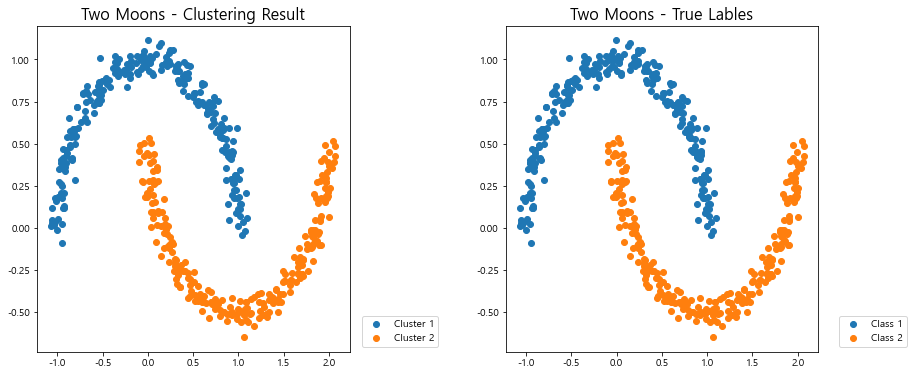

In [ ]:
# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Two Moons - Clustering Result', fontsize=16)
for c in np.unique(moons_clusters):
    plt.scatter(moons_x[moons_clusters == c,0], moons_x[moons_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Two Moons - True Lables', fontsize=16)
for c in np.unique(moons_y):
    plt.scatter(moons_x[moons_y == c,0], moons_x[moons_y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()